In [41]:
import os
import pandas as pd
import numpy as np
import math
import datetime as dt

# For Evalution we will use these library

from sklearn.metrics import mean_squared_error, mean_absolute_error, explained_variance_score, r2_score 
from sklearn.metrics import mean_poisson_deviance, mean_gamma_deviance, accuracy_score
from sklearn.preprocessing import MinMaxScaler

# For model building we will use these library

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.layers import LSTM


# For PLotting we will use these library

import matplotlib.pyplot as plt
from itertools import cycle
import plotly.graph_objects as go
import plotly.express as px
from plotly.subplots import make_subplots

In [42]:
maindf = pd.read_csv("https://raw.githubusercontent.com/Sxuoi/UNI_Assign/main/IDRtoUSD.csv")
maindf

,Date,Open,High,Low,Close,Adj Close,Volume
0,2001-06-28,11441.000000,11565.000000,11338.000000,11448.000000,11448.000000,0.0
1,2001-06-29,11370.000000,11510.000000,11265.000000,11390.000000,11390.000000,0.0
2,2001-07-02,11315.000000,11490.000000,11215.000000,11320.000000,11320.000000,0.0
3,2001-07-03,11330.000000,11455.000000,11188.000000,11322.000000,11322.000000,0.0
4,2001-07-04,11355.000000,11465.000000,11251.000000,11365.000000,11365.000000,0.0
...,...,...,...,...,...,...,...
5972,2024-05-20,15958.000000,16006.299805,15943.400391,15958.000000,15958.000000,0.0
5973,2024-05-21,16031.000000,16045.000000,15947.200195,16031.000000,16031.000000,0.0
5974,2024-05-22,16005.000000,16051.000000,15959.400391,16005.000000,16005.000000,0.0
5975,2024-05-23,16040.700195,16078.200195,16005.200195,16040.700195,16040.700195,0.0


In [43]:
maindf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5977 entries, 0 to 5976
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       5977 non-null   object 
 1   Open       5770 non-null   float64
 2   High       5770 non-null   float64
 3   Low        5770 non-null   float64
 4   Close      5770 non-null   float64
 5   Adj Close  5770 non-null   float64
 6   Volume     5770 non-null   float64
dtypes: float64(6), object(1)
memory usage: 327.0+ KB


In [44]:
maindf.describe()

,Open,High,Low,Close,Adj Close,Volume
count,5770.000000,5770.000000,5770.000000,5770.000000,5770.000000,5770.0
mean,11560.272374,11666.973455,11470.512534,11571.050064,11571.050064,0.0
std,2512.615412,3475.348709,2524.149178,2452.028709,2452.028709,0.0
min,9.000000,9.000000,4.000000,888.109985,888.109985,0.0
25%,9188.249756,9240.599609,9109.399903,9187.624756,9187.624756,0.0
50%,11130.000000,11301.000000,10953.000000,11110.000000,11110.000000,0.0
75%,14059.949951,14123.875244,13976.207275,14036.900146,14036.900146,0.0
max,17144.000000,197804.000000,16440.923828,16504.800781,16504.800781,0.0


In [45]:
print('Null Values:',maindf.isnull().values.sum())
print('NA values:',maindf.isnull().values.any())

Null Values: 1242
NA values: True


In [46]:
maindf=maindf.dropna()
print('Null Values:',maindf.isnull().values.sum())
print('NA values:',maindf.isnull().values.any())

Null Values: 0
NA values: False


In [47]:
maindf.shape


(5770, 7)

# Analisis data dari awal sampai sekarang

In [48]:
maindf['Date'] = pd.to_datetime(maindf['Date'], format='%Y-%m-%d')

y_overall = maindf.loc[(maindf['Date'] >= '2001-06-28')
                     & (maindf['Date'] <= '2024-05-24')]

y_overall.drop(y_overall[['Adj Close','Volume']],axis=1)

C:\Users\stafg\AppData\Local\Temp\ipykernel_15684\1871184996.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,Date,Open,High,Low,Close
0,2001-06-28,11441.000000,11565.000000,11338.000000,11448.000000
1,2001-06-29,11370.000000,11510.000000,11265.000000,11390.000000
2,2001-07-02,11315.000000,11490.000000,11215.000000,11320.000000
3,2001-07-03,11330.000000,11455.000000,11188.000000,11322.000000
4,2001-07-04,11355.000000,11465.000000,11251.000000,11365.000000
...,...,...,...,...,...
5972,2024-05-20,15958.000000,16006.299805,15943.400391,15958.000000
5973,2024-05-21,16031.000000,16045.000000,15947.200195,16031.000000
5974,2024-05-22,16005.000000,16051.000000,15959.400391,16005.000000
5975,2024-05-23,16040.700195,16078.200195,16005.200195,16040.700195


In [49]:
monthvise= y_overall.groupby(y_overall['Date'].dt.strftime('%B'))[['Open','Close']].mean()
new_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 
             'September', 'October', 'November', 'December']
monthvise = monthvise.reindex(new_order, axis=0)
monthvise

,Open,Close
Date,,
January,11541.968881,11530.794985
February,11530.466533,11506.480888
March,11605.121028,11595.469395
April,11584.039103,11572.925699
May,11610.235642,11601.832664
June,11392.009136,11470.519589
July,11274.919520,11455.377286
August,11535.089005,11526.033492
September,11628.288623,11621.534582


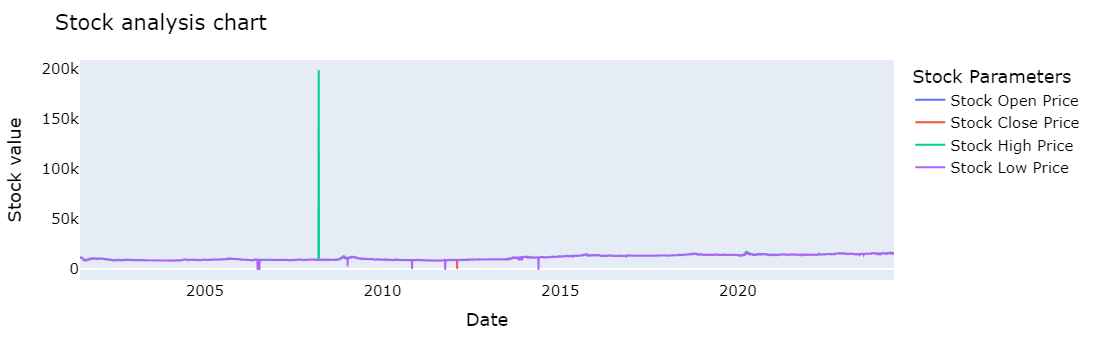

In [50]:
names = cycle(['Stock Open Price','Stock Close Price','Stock High Price','Stock Low Price'])

fig = px.line(y_overall, x=y_overall.Date, y=[y_overall['Open'], y_overall['Close'], 
                                          y_overall['High'], y_overall['Low']],
             labels={'Date': 'Date','value':'Stock value'})
fig.update_layout(title_text='Stock analysis chart', font_size=15, font_color='black',legend_title_text='Stock Parameters')
fig.for_each_trace(lambda t:  t.update(name = next(names)))
fig.update_xaxes(showgrid=False)
fig.update_yaxes(showgrid=False)

fig.show()

In [51]:
closedf = maindf[['Date','Close']]
print("Shape of close dataframe:", closedf.shape)

Shape of close dataframe: (5770, 2)


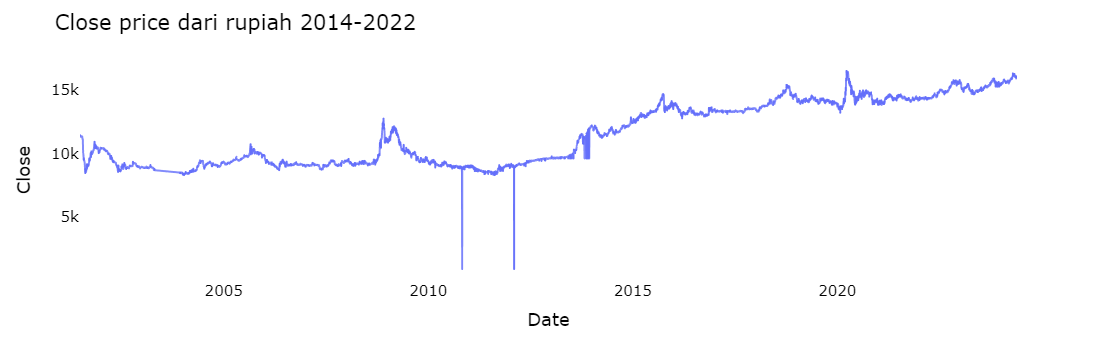

In [52]:
fig = px.line(closedf, x=closedf.Date, y=closedf.Close,labels={'date':'Date','close':'Close Stock'})
fig.update_traces(marker_line_width=2, opacity=0.8, marker_line_color='orange')
fig.update_layout(title_text='Close price dari rupiah 2014-2022', plot_bgcolor='white', 
                  font_size=15, font_color='black')
fig.update_xaxes(showgrid=False)
fig.update_yaxes(showgrid=False)
fig.show()

# Ambil 4 tahun terakhir dari data


In [53]:
closedf = closedf[closedf['Date'] > '2021-05-23']
close_stock = closedf.copy()
print("Total data for prediction: ",closedf.shape[0])

Total data for prediction:  785


In [54]:
closedf

,Date,Close
5192,2021-05-24,14348.000000
5193,2021-05-25,14365.000000
5194,2021-05-26,14371.400391
5195,2021-05-27,14310.000000
5196,2021-05-28,14318.000000
...,...,...
5972,2024-05-20,15958.000000
5973,2024-05-21,16031.000000
5974,2024-05-22,16005.000000
5975,2024-05-23,16040.700195


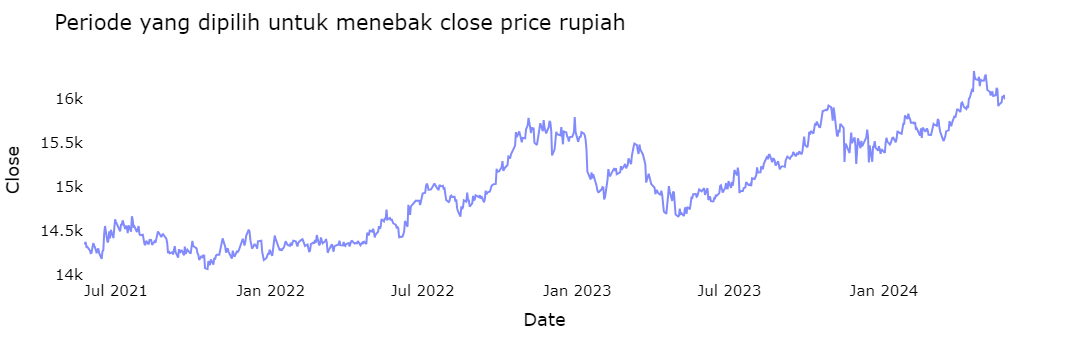

In [55]:
fig = px.line(closedf, x=closedf.Date, y=closedf.Close,labels={'date':'Date','close':'Close Stock'})
fig.update_traces(marker_line_width=2, opacity=0.8, marker_line_color='orange')
fig.update_layout(title_text='Periode yang dipilih untuk menebak close price rupiah', 
                  plot_bgcolor='white', font_size=15, font_color='black')
fig.update_xaxes(showgrid=False)
fig.update_yaxes(showgrid=False)
fig.show()

In [56]:
# deleting date column and normalizing using MinMax Scaler

del closedf['Date']
scaler=MinMaxScaler(feature_range=(0,1))
closedf=scaler.fit_transform(np.array(closedf).reshape(-1,1))
print(closedf.shape)
print(scaler)

(785, 1)
MinMaxScaler()


In [57]:
# we keep the training set as 60% and 40% testing set

training_size=int(len(closedf)*0.60)
test_size=len(closedf)-training_size
train_data,test_data=closedf[0:training_size,:],closedf[training_size:len(closedf),:1]
print("train_data: ", train_data.shape)
print("test_data: ", test_data.shape)

train_data:  (471, 1)
test_data:  (314, 1)


In [58]:
# convert an array of values into a dataset matrix

def create_dataset(dataset, time_step=1):
    dataX, dataY = [], []
    for i in range(len(dataset)-time_step-1):
        a = dataset[i:(i+time_step), 0]   ###i=0, 0,1,2,3-----99   100 
        dataX.append(a)
        dataY.append(dataset[i + time_step, 0])
    return np.array(dataX), np.array(dataY)

In [59]:
time_step = 15 #berapa banyak data dibelakang yang diambil
X_train, y_train = create_dataset(train_data, time_step)
X_test, y_test = create_dataset(test_data, time_step)

print("X_train: ", X_train.shape)
print("y_train: ", y_train.shape)
print("X_test: ", X_test.shape)
print("y_test", y_test.shape)

X_train:  (455, 15)
y_train:  (455,)
X_test:  (298, 15)
y_test (298,)


In [60]:
# reshape input to be [samples, time steps, features] which is required for LSTM
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

print("X_train: ", X_train.shape)
print("X_test: ", X_test.shape)

X_train:  (455, 15, 1)
X_test:  (298, 15, 1)


In [61]:
model=Sequential()

model.add(LSTM(10,input_shape=(None,1),activation="relu"))

model.add(Dense(1))

model.compile(loss="mean_squared_error",optimizer="adam")

C:\Users\stafg\anaconda3\envs\streamlitenv\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



In [62]:
history = model.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=200,batch_size=32,verbose=1)

Epoch 1/200
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 0.1478 - val_loss: 0.3833
Epoch 2/200
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0915 - val_loss: 0.2668
Epoch 3/200
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0727 - val_loss: 0.1536
Epoch 4/200
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0357 - val_loss: 0.0569
Epoch 5/200
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0184 - val_loss: 0.0128
Epoch 6/200
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0130 - val_loss: 0.0111
Epoch 7/200
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0100 - val_loss: 0.0072
Epoch 8/200
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0076 - val_loss: 0.0050
Epoch 9/200
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0062 - val_loss: 0.0055
Epoch 10/200
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0054 - val_loss: 0.0073
Epoch 11/200
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0045 - val_loss: 0.0089
Epoch 12/200
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.

15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 8.1929e-04 - val_loss: 0.0016


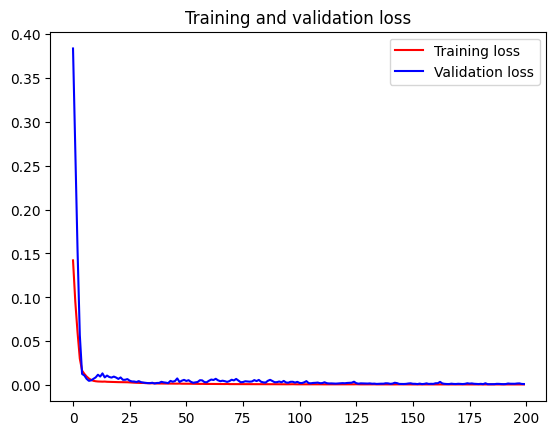

<Figure size 640x480 with 0 Axes>

In [63]:
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(loss))

plt.plot(epochs, loss, 'r', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend(loc=0)
plt.figure()


plt.show()

In [64]:
### Prediction and check performance metrics
train_predict=model.predict(X_train)
test_predict=model.predict(X_test)
train_predict.shape, test_predict.shape

15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 974us/step


((455, 1), (298, 1))

In [65]:
# Transform back to original form

train_predict = scaler.inverse_transform(train_predict)
test_predict = scaler.inverse_transform(test_predict)
original_ytrain = scaler.inverse_transform(y_train.reshape(-1,1)) 
original_ytest = scaler.inverse_transform(y_test.reshape(-1,1)) 

In [66]:
# Evaluation metrices RMSE and MAE
print("Train data RMSE: ", math.sqrt(mean_squared_error(original_ytrain,train_predict)))
print("Train data MSE: ", mean_squared_error(original_ytrain,train_predict))
print("Train data MAE: ", mean_absolute_error(original_ytrain,train_predict))
print("-------------------------------------------------------------------------------------")
print("Test data RMSE: ", math.sqrt(mean_squared_error(original_ytest,test_predict)))
print("Test data MSE: ", mean_squared_error(original_ytest,test_predict))
print("Test data MAE: ", mean_absolute_error(original_ytest,test_predict))

Train data RMSE:  64.52903958169911
Train data MSE:  4163.99694933649
Train data MAE:  48.066766812362644
-------------------------------------------------------------------------------------
Test data RMSE:  82.84444535679681
Test data MSE:  6863.202126475292
Test data MAE:  60.786083664639236


In [67]:
print("Train data explained variance regression score:", 
      explained_variance_score(original_ytrain, train_predict))
print("Test data explained variance regression score:", 
      explained_variance_score(original_ytest, test_predict))

Train data explained variance regression score: 0.9810169132182384
Test data explained variance regression score: 0.9588609671709573


In [68]:
print("Train data R2 score:", r2_score(original_ytrain, train_predict))
print("Test data R2 score:", r2_score(original_ytest, test_predict))

Train data R2 score: 0.9809600836423005
Test data R2 score: 0.9578579842720618


In [69]:
print("Train data MGD: ", mean_gamma_deviance(original_ytrain, train_predict))
print("Test data MGD: ", mean_gamma_deviance(original_ytest, test_predict))
print("----------------------------------------------------------------------")
print("Train data MPD: ", mean_poisson_deviance(original_ytrain, train_predict))
print("Test data MPD: ", mean_poisson_deviance(original_ytest, test_predict))

Train data MGD:  1.8852158548234463e-05
Test data MGD:  2.8478176535425666e-05
----------------------------------------------------------------------
Train data MPD:  0.28001625545900655
Test data MPD:  0.44194203165285373


In [75]:
import joblib
import pickle
model_name = 'my_model.pkl'
pickle.dump(model,open('my_model.pkl','wb'))

PermissionError: [Errno 13] Permission denied: 'my_model.pkl'

Train predicted data:  (785, 1)
Test predicted data:  (785, 1)


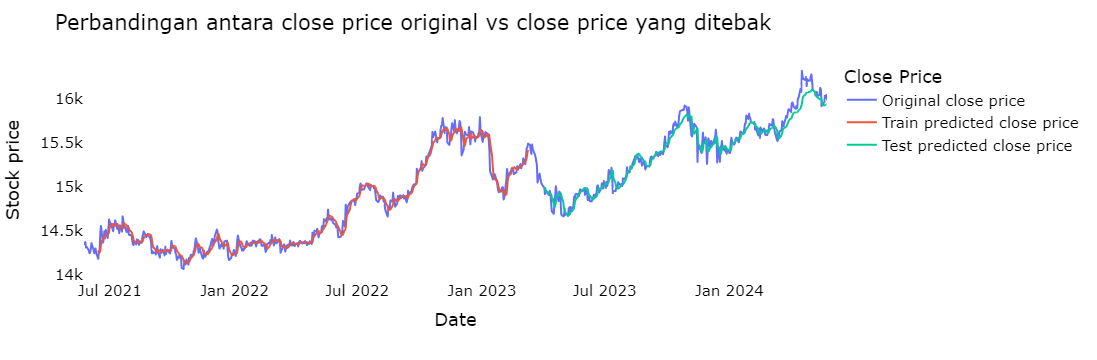

In [31]:
# shift train predictions for plotting

look_back=time_step
trainPredictPlot = np.empty_like(closedf)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict
print("Train predicted data: ", trainPredictPlot.shape)

# shift test predictions for plotting
testPredictPlot = np.empty_like(closedf)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(closedf)-1, :] = test_predict
print("Test predicted data: ", testPredictPlot.shape)

names = cycle(['Original close price','Train predicted close price','Test predicted close price'])


plotdf = pd.DataFrame({'date': close_stock['Date'],
                       'original_close': close_stock['Close'],
                      'train_predicted_close': trainPredictPlot.reshape(1,-1)[0].tolist(),
                      'test_predicted_close': testPredictPlot.reshape(1,-1)[0].tolist()})

fig = px.line(plotdf,x=plotdf['date'], y=[plotdf['original_close'],plotdf['train_predicted_close'],
                                          plotdf['test_predicted_close']],
              labels={'value':'Stock price','date': 'Date'})
fig.update_layout(title_text='Perbandingan antara close price original vs close price yang ditebak',
                  plot_bgcolor='white', font_size=15, font_color='black', legend_title_text='Close Price')
fig.for_each_trace(lambda t:  t.update(name = next(names)))

fig.update_xaxes(showgrid=False)
fig.update_yaxes(showgrid=False)
fig.show()

In [36]:
x_input=test_data[len(test_data)-time_step:].reshape(1,-1)
temp_input=list(x_input)
temp_input=temp_input[0].tolist()

from numpy import array

lst_output=[]
n_steps=time_step
i=0
pred_days = 100
while(i<pred_days):
    
    if(len(temp_input)>time_step):
        
        x_input=np.array(temp_input[1:])
        #print("{} day input {}".format(i,x_input))
        x_input = x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        
        yhat = model.predict(x_input, verbose=0)
        #print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        #print(temp_input)
       
        lst_output.extend(yhat.tolist())
        i=i+1
        
    else:
        
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        temp_input.extend(yhat[0].tolist())
        
        lst_output.extend(yhat.tolist())
        i=i+1
               
print("Output of predicted next days: ", len(lst_output))

Output of predicted next days:  100


In [37]:
last_days=np.arange(1,time_step+1)
day_pred=np.arange(time_step+1,time_step+pred_days+1)
print(last_days)
print(day_pred)

[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15]
[ 16  17  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33
  34  35  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51
  52  53  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69
  70  71  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87
  88  89  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105
 106 107 108 109 110 111 112 113 114 115]


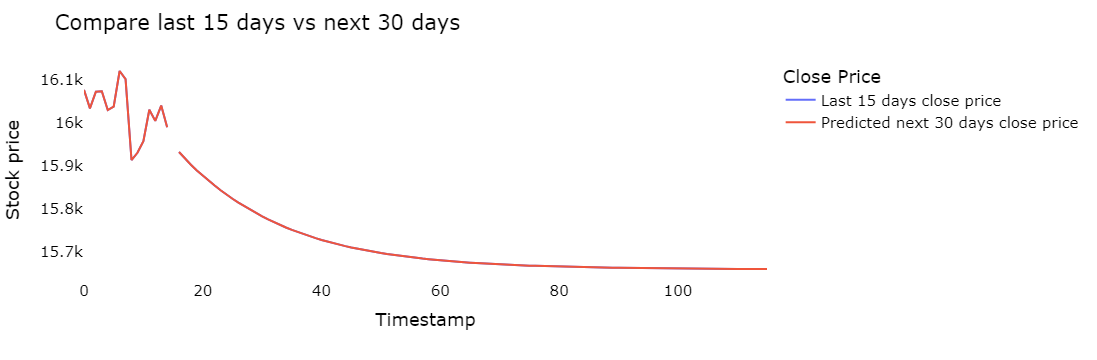

In [38]:
temp_mat = np.empty((len(last_days)+pred_days+1,1))
temp_mat[:] = np.nan
temp_mat = temp_mat.reshape(1,-1).tolist()[0]

last_original_days_value = temp_mat
next_predicted_days_value = temp_mat

last_original_days_value[0:time_step+1] = scaler.inverse_transform(closedf[len(closedf)-time_step:]).reshape(1,-1).tolist()[0]
next_predicted_days_value[time_step+1:] = scaler.inverse_transform(np.array(lst_output).reshape(-1,1)).reshape(1,-1).tolist()[0]

new_pred_plot = pd.DataFrame({
    'last_original_days_value':last_original_days_value,
    'next_predicted_days_value':next_predicted_days_value
})

names = cycle(['Last 15 days close price','Predicted next 30 days close price'])

fig = px.line(new_pred_plot,x=new_pred_plot.index, y=[new_pred_plot['last_original_days_value'],
                                                      new_pred_plot['next_predicted_days_value']],
              labels={'value': 'Stock price','index': 'Timestamp'})
fig.update_layout(title_text='Compare last 15 days vs next 30 days',
                  plot_bgcolor='white', font_size=15, font_color='black',legend_title_text='Close Price')

fig.for_each_trace(lambda t:  t.update(name = next(names)))
fig.update_xaxes(showgrid=False)
fig.update_yaxes(showgrid=False)
fig.show()

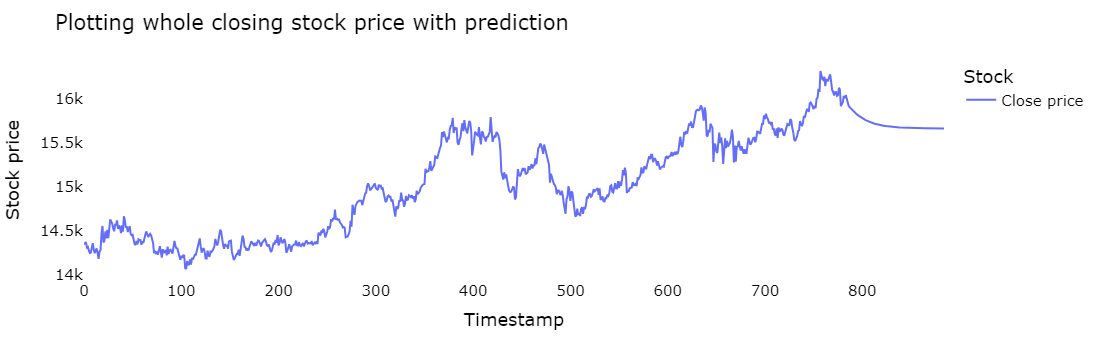

In [39]:
lstmdf=closedf.tolist()
lstmdf.extend((np.array(lst_output).reshape(-1,1)).tolist())
lstmdf=scaler.inverse_transform(lstmdf).reshape(1,-1).tolist()[0]

names = cycle(['Close price'])

fig = px.line(lstmdf,labels={'value': 'Stock price','index': 'Timestamp'})
fig.update_layout(title_text='Plotting whole closing stock price with prediction',
                  plot_bgcolor='white', font_size=15, font_color='black',legend_title_text='Stock')

fig.for_each_trace(lambda t:  t.update(name = next(names)))

fig.update_xaxes(showgrid=False)
fig.update_yaxes(showgrid=False)
fig.show()